# Actividad 3

Imports

In [32]:
# AGREGUE LOS IMPORT NECESARIOS
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## P1: Implementación de métricas

In [33]:
# P1.1
def confusion_matrix_elements(true_labels, predicted_labels):
    tn, fp, fn, tp = 0, 0, 0, 0
    for i in range(len(true_labels)):
        if true_labels[i] == 0 and predicted_labels[i] == 0:
            tn += 1
        elif true_labels[i] == 0 and predicted_labels[i] == 1:
            fp += 1
        elif true_labels[i] == 1 and predicted_labels[i] == 0:
            fn += 1
        elif true_labels[i] == 1 and predicted_labels[i] == 1:
            tp += 1
    return tn, fp, fn, tp

In [34]:
# P1.2
def plot_confusion_matrix(true_labels, predicted_labels,string):
    tn, fp, fn, tp = confusion_matrix_elements(true_labels, predicted_labels)
    sns.heatmap([[tn, fp], [fn, tp]], annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1']
                , cbar=True, cbar_kws={'label': 'Cantidad de datos'}, square=True)
    plt.title('Matriz de confusión')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.savefig(string+'.png')
    plt.show()

In [35]:
# P1.3
# Ejemplo de cómo definir cada función:
def recall(tn, fp, fn, tp):
    return tp / (tp + fn)
def especifidad(tn, fp, fn, tp):
    return tn / (tn + fp)
def falsos_positivos(tn, fp, fn, tp):
    return fp / (fp + tn)
def falsos_negativos(tn, fp, fn, tp):
    return fn / (fn + tp)
def precision(tn, fp, fn, tp):
    return tp / (tp + fp)
def f1_score(tn, fp, fn, tp):
    P=precision(tn, fp, fn, tp)
    R=recall(tn, fp, fn, tp)
    return (2 * P*R / (P + R))


In [36]:
# P1.4
def plot_roc_curve(true_labels, predicted_proba, string):
    orden = np.argsort(predicted_proba)[::-1]
    predicted_proba = predicted_proba[orden]
    true_labels = true_labels[orden]
    tpr = []
    fpr = []
    for i in range(len(true_labels)):
        tn, fp, fn, tp = confusion_matrix_elements(true_labels, predicted_proba >= predicted_proba[i])
        tpr.append(tp / (tp + fn))
        fpr.append(fp / (fp + tn))
    # Graficar la curva ROC
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title('Curva ROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.savefig(string+'.png')
    plt.show()

    

## P2: Análisis de métricas

In [37]:
# Generación de datos *NO TOCAR ESTE BLOQUE*
n_samples = 1000
y_true = np.concatenate((
    np.zeros((n_samples // 2,)),
    np.ones((n_samples // 2,)),
))
predicted_proba = np.concatenate((
    np.random.RandomState(0).normal(loc=0.3, scale=0.12, size=n_samples // 2).clip(min=0.01),
    np.random.RandomState(1).normal(loc=0.7, scale=0.12, size=n_samples // 2).clip(max=0.99),
))

Recall:  0.952
Especificidad:  0.944
Falsos positivos:  0.056
Falsos negativos:  0.048
Precision:  0.9444444444444444
F1-Score:  0.9482071713147411


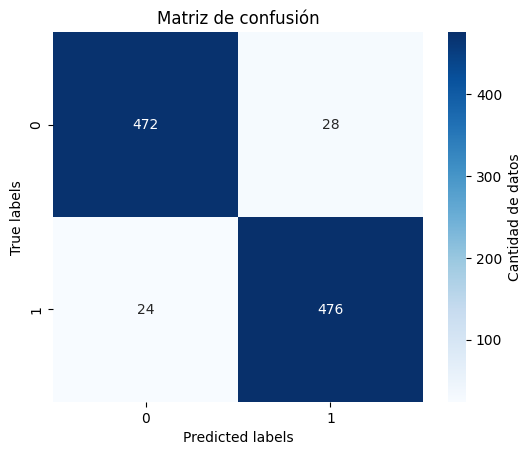

In [38]:
# P2.1
predicted_labels=np.zeros(len(predicted_proba))
for i in range(len(predicted_proba)):
    if predicted_proba[i] >= 0.5:
        predicted_labels[i]=1
    if predicted_proba[i] < 0.5:
        predicted_labels[i]=0
tn, fp, fn, tp  =confusion_matrix_elements(y_true, predicted_labels)
recall_value=recall(tn, fp, fn, tp)
especifidad_value=especifidad(tn, fp, fn, tp)
falsos_positivos_value=falsos_positivos(tn, fp, fn, tp)
falsos_negativos_value=falsos_negativos(tn, fp, fn, tp)
precision_value=precision(tn, fp, fn, tp)
f1_score_value=f1_score(tn, fp, fn, tp)
print('Recall: ', recall_value)
print('Especificidad: ', especifidad_value)
print('Falsos positivos: ', falsos_positivos_value)
print('Falsos negativos: ', falsos_negativos_value)
print('Precision: ', precision_value)
print('F1-Score: ', f1_score_value)
plot_confusion_matrix(y_true, predicted_labels,'P2-1')


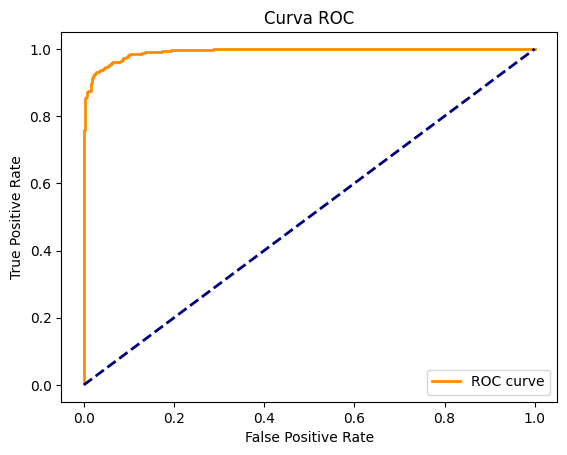

In [39]:
# P2.2
plot_roc_curve(y_true, predicted_proba,'P2-2')

Respuesta P2.3: Considerando el escenario de la tarea, es mejor fijar el umbral a mayor que 0.5, esto pues el detectar
la enfermad como positiva conlleva a un tratamiento demasiado invasivo, por lo que queremos obtener la mayor cantidad
posible de predicciones positivas. Aunque esto tambien puede llevar a que la cantidad de falsos negativos aumente, sin embargo
sabemos que el coste de un falso negativo es mucho menor que el de un falso positivo, por lo que no sera tanto problema
siempre y cuando se escoja un umbral correcto


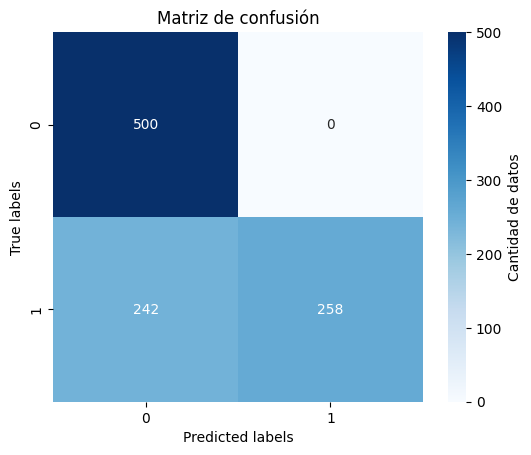

In [40]:
# P2.4 código
predicted_labels=np.zeros(len(predicted_proba))
for i in range(len(predicted_proba)):
    if predicted_proba[i] >= 0.7:
        predicted_labels[i]=1
    if predicted_proba[i] < 0.7:
        predicted_labels[i]=0
tn, fp, fn, tp  =confusion_matrix_elements(y_true, predicted_labels)
plot_confusion_matrix(y_true, predicted_labels,'P2-4')

Respuesta P2.4: Al aumentar el umbral a 0.7 notamos que la cantidad de falsos positivos es igual a 0, esto es realmente
bueno, puesto que para razones del problema, el costo de un falso positivo es bastante grande, por lo que el no clasificar
a una persona sana como enferma es lo que se espera. Ademas de esto la cantidad de falso negativos aumento considerablemente, lo
que era esperado por lo comentado en P2.3. 

Para este caso el aumentar a 0.7 ya nos muestra que clasificaremos a una persona como enferma solo si estamos muy seguros, por lo que
el aumentar el umbral aun mas, solo aumentara la cantidad de falsos negativos. De igual forma, al disminuir este umbral, la cantidad
de falsos positivos comenzara a aumentar, y el de falso negativos disminuira, situacion que para especificaciones de problema no es recomendado.